# Task One : Cleaning Data 

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Importing data

In [184]:
# load the data
df = pd.read_csv("train.csv")

In [185]:
# preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
print("The shape of the DataFrame is = {}".format(df.shape))

The shape of the DataFrame is = (891, 12)


In [187]:
# check the column names   
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [188]:
df.set_index("PassengerId" , inplace=True  )

- I put PassengerId as index because it's unique values

In [189]:
# check data type
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

-  I checked data types of columns and there aren't need any modification.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- There are three columns with missing values ( Age , Cabin , Embarked )


# Cleaning Data

In [191]:
#Check missing values 
Total = df.isnull().sum().sort_values(ascending = False)
Present = Total/df.isnull().count()
missing_value = pd.concat([Total, Present] , keys=['Total','Present'] ,axis =1).round(3) 
missing_value

,Total,Present
Cabin,687,0.771
Age,177,0.199
Embarked,2,0.002
Survived,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
SibSp,0,0.000
Parch,0,0.000
Ticket,0,0.000


 - We note that there are .77% missing values in Cabin and 0.20% missing values in Age and 0.002% missing values in Embarked 

In [192]:
df.duplicated().sum()

0

- We note that there aren't duplicates

# Number of people for each class

In [193]:
df['Pclass'].value_counts().sort_values(ascending=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

 - There are three class

# Number of people for each gender

In [194]:
df['Sex'].value_counts().sort_values(ascending=False)

male      577
female    314
Name: Sex, dtype: int64

In [195]:
df['Embarked'].value_counts().sort_values(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Drop the Cabin  because it has more missing values 

In [196]:
df = df.drop(['Cabin' ] , axis =1  )

In [197]:
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace=True  )

In [198]:
df["Sex"] = df["Sex"].map({"female":1 , "male":0})

# Preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [199]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

# Fill the missing values in age column based on Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [200]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()
        age_mean = guess_df.mean()
        guess_ages[i,j] = int( age_mean) 
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), 'Age'] = guess_ages[i,j]

df['Age'] = df['Age'].astype(int)

In [201]:
df.isnull().sum().max()

0

In [202]:
df["Sex"] = df["Sex"].map({1:"female" , 0:"male"})

# Removeing Outliers 

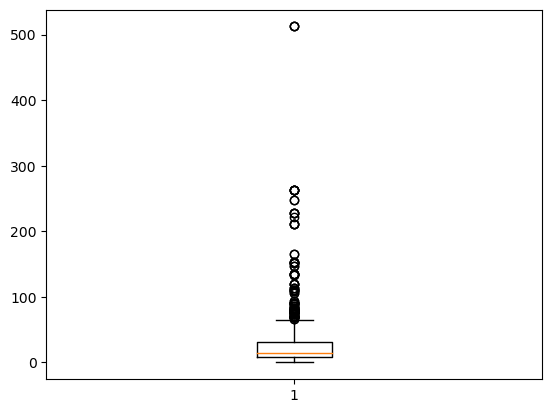

In [203]:
plt.boxplot(df['Fare'])
plt.show()

In [204]:
df.drop(df[df['Fare']>=45].index , inplace=True)

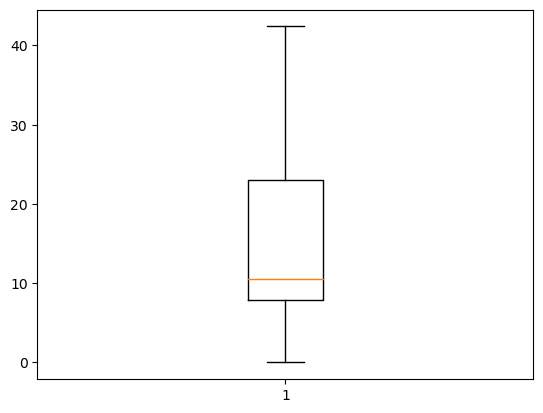

In [205]:
plt.boxplot(df['Fare'])
plt.show()

In [206]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,26,0,0,330877,8.4583,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S


In [207]:
print("The shape of the DataFrame is = {}".format(df.shape))

The shape of the DataFrame is = (720, 10)


# We have successfully cleaned our data

In [208]:
df.to_csv("New_train.csv")

# GOOD LUCK !